In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))

In [3]:
df['week'] = df.apply(lambda row: f"""{row["rok"]}-{row["tyden"]}""", axis=1)

In [4]:
df['vydavatel'] = df['vydavatel'].apply(lambda x: x.split('/'))
df = df.explode('vydavatel')

In [5]:
df.groupby('vydavatel').size().nlargest(60)

vydavatel
Universal Music         41178
Warner Music            21187
Sony Music              17874
Supraphon                2405
Brainzone                2399
Nan                      2078
Singlton                  981
I.Richmond.P.             871
Championship Music        290
Marek Ztracený            278
Rgme                      206
Olga Lounová Records      176
Kontor Records            133
Um                        122
Lewron Music Center       121
Tr                        111
Forza                     105
Onairmusic                105
Wm                        105
Chm                        99
Parlophone                 99
Dade Music                 88
Vivienne Records           85
Hfr                        82
Vis-A-Vis Prod.            80
The Silver Spoons          74
Am                         72
Ingrooves                  72
Art Shock                  66
Richrec                    66
Homerun Records            63
Biograf Jan Svěrák         57
M&M Brothers               50


In [6]:
df.loc[df['vydavatel'] == "Um","vydavatel"]="Universal Music"
df.loc[df['vydavatel'] == "Wm","vydavatel"]="Warner Music"

In [7]:
def podil(vydavatel, misto):
    pracovni_df = df[df['pozice'] <= misto]
    return (pracovni_df[pracovni_df['vydavatel'] == vydavatel].groupby('rok').size() / pracovni_df.groupby('rok').size()).plot.bar()

## Podíl největších vydavatelů v…

### Top 100

<Axes: xlabel='rok'>

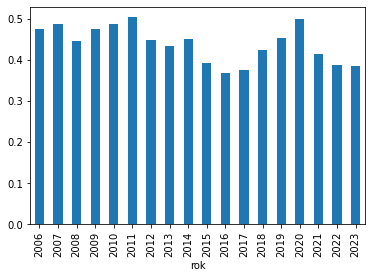

In [8]:
podil('Universal Music',100)

<Axes: xlabel='rok'>

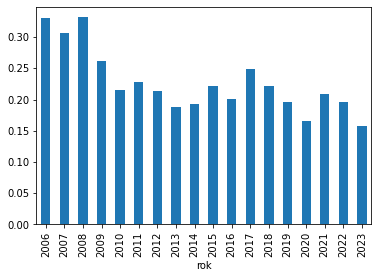

In [9]:
podil('Warner Music',100)

<Axes: xlabel='rok'>

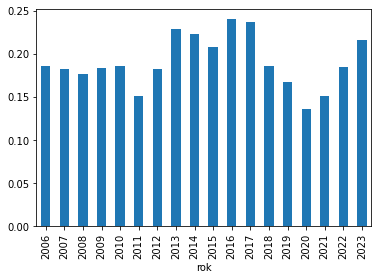

In [10]:
podil('Sony Music',100)

<Axes: xlabel='rok'>

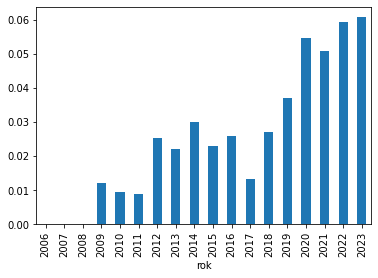

In [11]:
podil('Supraphon',100)

<Axes: xlabel='rok'>

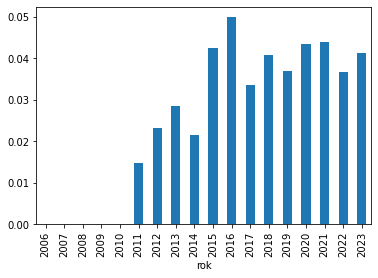

In [12]:
podil('Brainzone',100)

<Axes: xlabel='rok'>

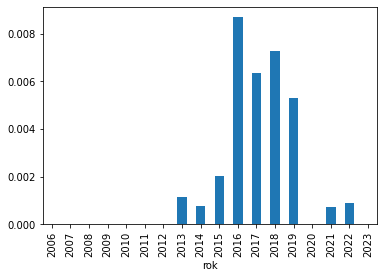

In [13]:
podil('Olga Lounová Records',100)

## Top 10

<Axes: xlabel='rok'>

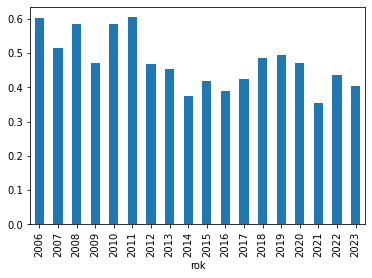

In [14]:
podil('Universal Music',10)

<Axes: xlabel='rok'>

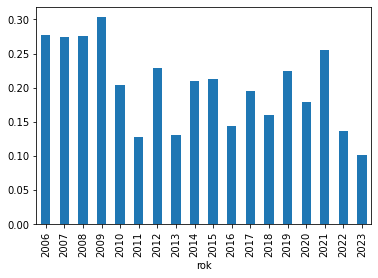

In [15]:
podil('Warner Music',10)

<Axes: xlabel='rok'>

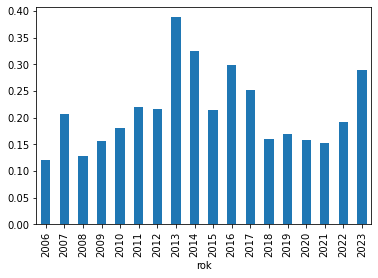

In [16]:
podil('Sony Music',10)

## Vrchol

<Axes: xlabel='rok'>

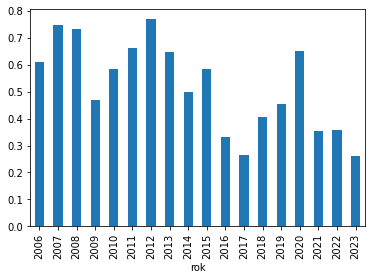

In [17]:
podil('Universal Music',1)

<Axes: xlabel='rok'>

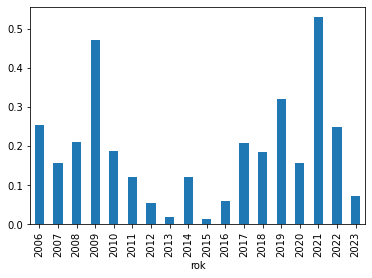

In [18]:
podil('Warner Music',1)

<Axes: xlabel='rok'>

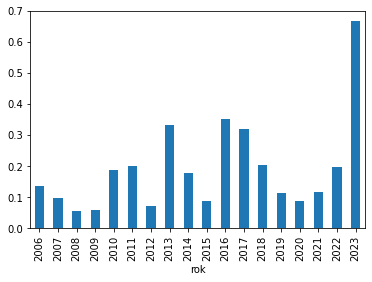

In [19]:
podil('Sony Music',1)

## Diverzita: kolik vydavatelů si sáhlo na…

### Top 100

<Axes: xlabel='rok'>

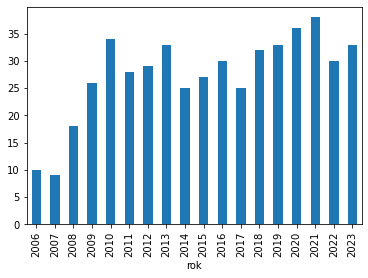

In [20]:
df.groupby('rok')['vydavatel'].nunique().plot.bar()

### Top 10

<Axes: xlabel='rok'>

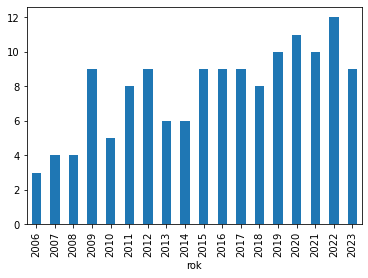

In [21]:
df[df['pozice'] <= 10].groupby('rok')['vydavatel'].nunique().plot.bar()

### Top 1

<Axes: xlabel='rok'>

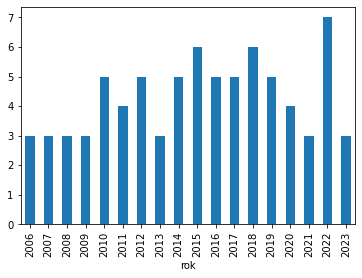

In [22]:
df[df['pozice'] <= 1].groupby('rok')['vydavatel'].nunique().plot.bar()

Nejde o optický klam? Nepřibylo diverzity kvůli tomu, že dříve nebyli tak vyplňovaní vydavatelé? Zjistíme!

<Axes: xlabel='rok'>

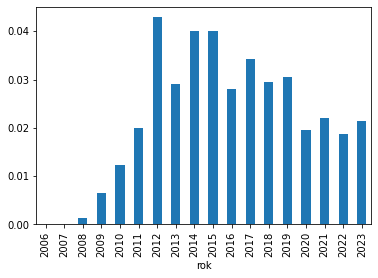

In [23]:
podil('Nan',100)

<Axes: xlabel='rok'>

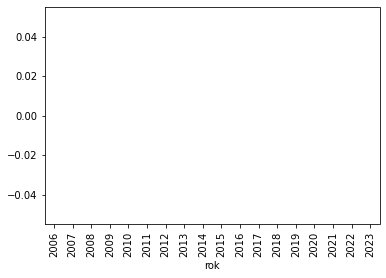

In [24]:
(df[df['vydavatel'].isnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar()

Nezdá se, nevyplněných je málo.

## Vydavatelé na prvním místě hitparád (a jejich první jedničkový hit):

In [25]:
df[df['pozice'] == 1].groupby('vydavatel')[['interpret','track','rok']].first().sort_values(by='rok')

,interpret,track,rok
vydavatel,,,
Sony Music,Shakira,Hips Don´t Lie,2006
Universal Music,Juanes,La camisa negra,2006
Warner Music,Madonna,Hung Up,2006
Chm,Xindl X Feat. Olga Lounová,Láska v housce,2010
Parlophone,Xindl X Feat. Olga Lounová,Láska v housce,2010
Supraphon,Václav Neckář & Umakart,Půlnoční,2011
Onairmusic,Nightwork,Čekám na signál,2012
Richrec,Kryštof,Inzerát,2012
Brainzone,Chinaski,Víno,2014
